In [18]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import json

In [75]:
def bs(date):
    return (date.split(' ')[0]+'T'+date.split(' ')[1])[:-3]

In [77]:
arr = pd.date_range(start='2018-01-01 00:00',end='2023-01-01 00:00',freq='5T')

print(len(arr))
print(len(arr)/6)

starts= []
ends = []

for i in range(6):
    start = i*len(arr)//6
    if (i+1)*len(arr)//6>=len(arr):
        end=len(arr)-1
    else:
        end = (i+1)*len(arr)//6
        
    starts.append(bs(str(arr[start])))
    ends.append(bs(str(arr[end])))
    print(f"start: {arr[start]}, end: {arr[end]}")

525889
87648.16666666667
start: 2018-01-01 00:00:00, end: 2018-11-01 08:00:00
start: 2018-11-01 08:00:00, end: 2019-09-01 16:00:00
start: 2019-09-01 16:00:00, end: 2020-07-02 00:00:00
start: 2020-07-02 00:00:00, end: 2021-05-02 08:00:00
start: 2021-05-02 08:00:00, end: 2022-03-02 16:00:00
start: 2022-03-02 16:00:00, end: 2023-01-01 00:00:00


In [85]:
df = pd.DataFrame(columns = ['Minutes5DK','PriceArea','CO2Emission'])

for i in range(len(starts)):
    start = starts[i]
    end = ends[i]
    URL = 'https://api.energidataservice.dk/dataset/CO2Emis?columns=Minutes5DK,PriceArea,CO2Emission&start='+start+'&end='+end+'&filter={"PriceArea":["DK1"]}&limit=87648'
    r = requests.get(URL)
    data = r.json()['records']
    tf = pd.DataFrame(data)
    df = df.append(tf)

In [97]:
df['Minutes5DK'] = pd.to_datetime(df['Minutes5DK'])
tf = df.sort_values(by='Minutes5DK').reset_index()

In [98]:
tf = tf.drop(['index'],axis=1)

In [101]:
tf.to_csv('carbon_emissions_data.csv')

<AxesSubplot:>

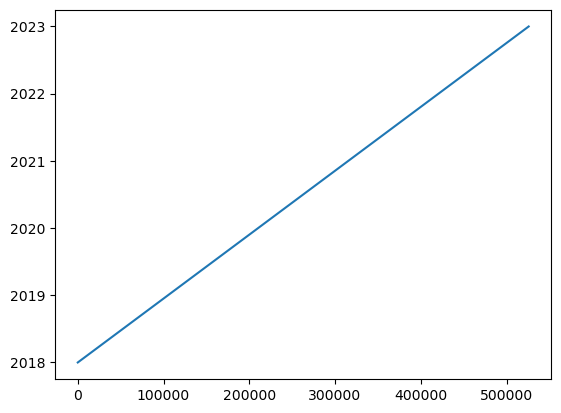

In [100]:
tf['Minutes5DK'].plot()

<AxesSubplot:>

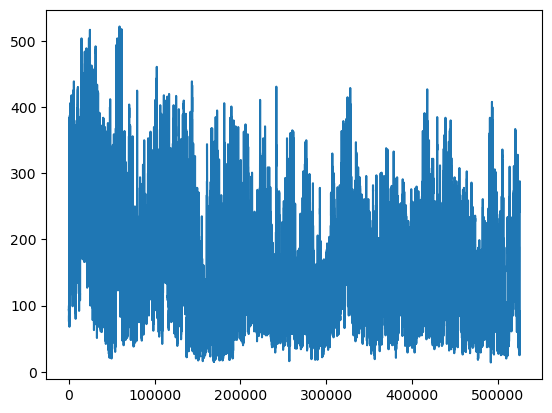

In [103]:
tf['CO2Emission'].plot()